In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

## Problem 1a Training datasets and plotting regression line

In [2]:
df = pd.read_csv(r"D:\Work\Y2 work\SC1015\Lab\Lab4\train .csv")
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [3]:
GrLivArea = pd.DataFrame(df['GrLivArea'])
SalePrice = pd.DataFrame(df['SalePrice'])


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

GrLivArea_train,GrLivArea_test,SalePrice_train,SalePrice_test = train_test_split(GrLivArea, SalePrice, test_size = 0.2)
print(f"Shape of GrLivArea_train is: {GrLivArea_train.shape[0]}")
print(f"Shape of GrLivArea_test is: {GrLivArea_test.shape[0]}")
print(f"Shape of SalePrice_train is: {SalePrice_train.shape[0]}")
print(f"Shape of SalePrice_test is: {SalePrice_test.shape[0]}")

Shape of GrLivArea_train is: 1168
Shape of GrLivArea_test is: 292
Shape of SalePrice_train is: 1168
Shape of SalePrice_test is: 292


In [5]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

In [6]:
# Train the Linear Regression model
linreg.fit(GrLivArea_train, SalePrice_train)

LinearRegression()

In [7]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [20588.40372858]
Coefficients 	: a =  [[105.16790463]]


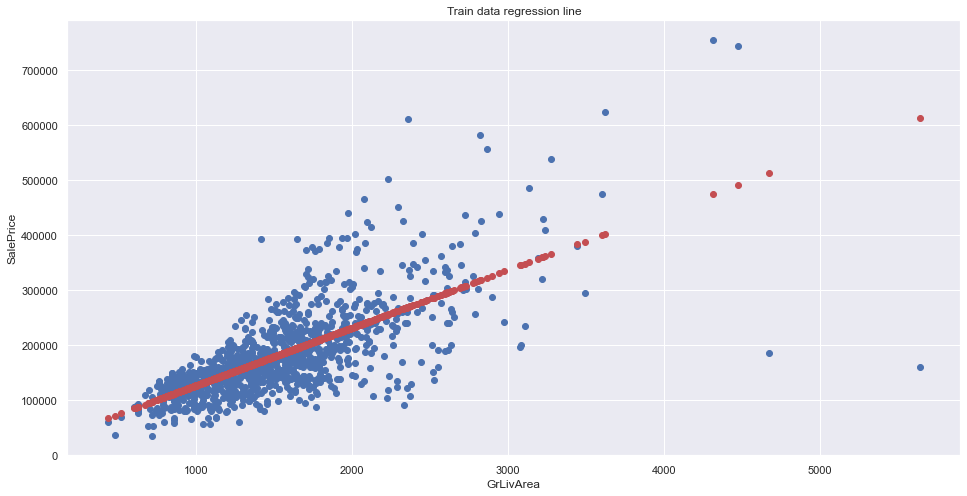

In [8]:
SalePrice_train_pred = linreg.predict(GrLivArea_train)
SalePrice_test_pred = linreg.predict(GrLivArea_test)
# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(GrLivArea_train, SalePrice_train)
plt.scatter(GrLivArea_train, SalePrice_train_pred, color = "r")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.title("Train data regression line")
plt.show()

## Coefficents of the model is 105 and intercept is 20588


## Problem 1b Goodness of fit and prediction accuracy

In [9]:
# Explained Variance (R^2)

print("Goodness of fit and prediction accuracy for Train Set")
print("Explained Variance (R^2) \t:", linreg.score(GrLivArea_train, SalePrice_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(SalePrice_train, SalePrice_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Goodness of fit and prediction accuracy for Train Set
Explained Variance (R^2) 	: 0.4990002364495725
Mean Squared Error (MSE) 	: 3179420036.8068705
Root Mean Squared Error (RMSE) 	: 56386.34619131542


In [10]:
# Explained Variance (R^2)
print("Goodness of fit and prediction accuracy for Test Set")
print("Explained Variance (R^2) \t:", linreg.score(GrLivArea_test, SalePrice_test))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(SalePrice_test, SalePrice_test_pred)
mse1= mean_squared_error(SalePrice_test, SalePrice_test_pred)
print("Mean Squared Error (MSE) \t:", mse1)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Goodness of fit and prediction accuracy for Test Set
Explained Variance (R^2) 	: 0.5102445989935376
Mean Squared Error (MSE) 	: 2991406236.0730968
Root Mean Squared Error (RMSE) 	: 54693.749515580814


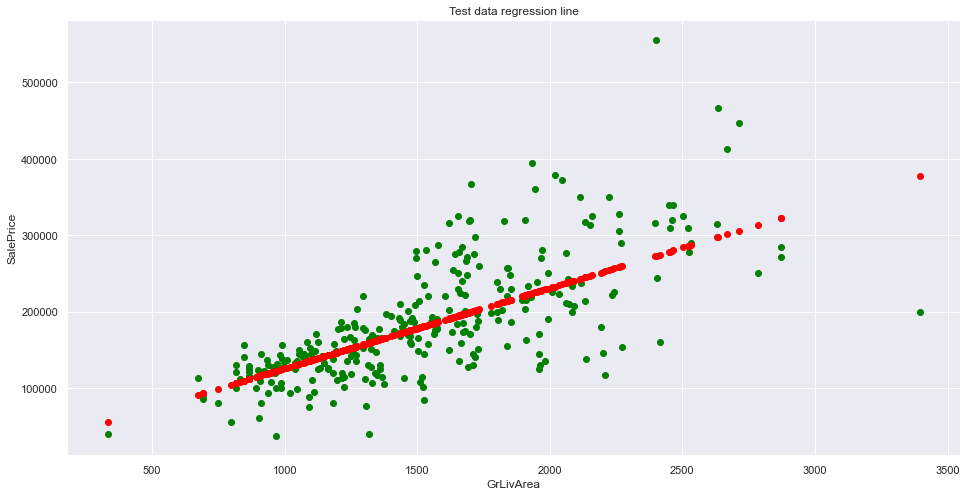

In [11]:
# Predict Total values corresponding to HP Test
SalePrice_test_pred = linreg.predict(GrLivArea_test)

# Plot the Predictions
f = plt.figure(figsize=(16, 8))
plt.scatter(GrLivArea_test, SalePrice_test, color = "green")
plt.scatter(GrLivArea_test, SalePrice_test_pred, color = "red")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.title("Test data regression line")
plt.show()

## Problem 2 Predicting SalePrice using Other Variables

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [13]:
def salePriceRegression(variable,dframe):
    X= pd.DataFrame(dframe[variable])   
    Y = pd.DataFrame(dframe['SalePrice']) 
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
    linreg = LinearRegression()
    linreg.fit(X_train, Y_train)
    print('Intercept of Regression \t: b = ', linreg.intercept_)
    print('Coefficients of Regression \t: a = ', linreg.coef_)
    print()
    Y_train_pred = linreg.predict(X_train)
    Y_test_pred = linreg.predict(X_test)
    
    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_train, Y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(Y_train, Y_train_pred)))
    print()
    
    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_test, Y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(Y_test, Y_test_pred)))
    print()


In [14]:
print("Regression for TotalBsmtSF:")
salePriceRegression("TotalBsmtSF",df)

Regression for TotalBsmtSF:
Intercept of Regression 	: b =  [66871.74494346]
Coefficients of Regression 	: a =  [[109.17452467]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3796158580151745
Mean Squared Error (MSE) 	: 3949583349.2397695
Root Mean Squared Error (RMSE) 	: 62845.710666995954

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.3514481541728536
Mean Squared Error (MSE) 	: 3877005986.0025625
Root Mean Squared Error (RMSE) 	: 62265.608372540315



In [15]:
print("Regression for GarageArea")
salePriceRegression("GarageArea",df)

Regression for GarageArea
Intercept of Regression 	: b =  [72920.47454667]
Coefficients of Regression 	: a =  [[227.86939587]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3811336433150604
Mean Squared Error (MSE) 	: 3852133661.542477
Root Mean Squared Error (RMSE) 	: 62065.55938314322

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.41639809153590235
Mean Squared Error (MSE) 	: 3872718610.761339
Root Mean Squared Error (RMSE) 	: 62231.17073269102



## I believe that the MSE is too large to be accurate as it is 4 degrees of magnitude higher than SalePrice. Additonally, MSE depends on the scale of values of the response variable and is recorded in absolute, making it hard to compare at first glance without looking at SalePrice concurrently. However, R^2 is bounded from 0 to 1 and captures the fraction of variance of actual values captured by the regression model. R^2 thus tells us how well a model can predict the value of the response variable in percentage terms which is the same for any model we use, making it easy to compare and contrast

### The model for predicting SalePrice based on GrLivArea is the best. Its test set has a better goodness of fit for model as its explained variance is the highest at 0.501 compared to TotalBsmtSF's of 0.351 and GarageArea's 0.416. Additonally, its prediction accuracy for the test set is highest as well. Its mean squared error is lowest at 2991406236 compared to TotalBsmtSF's 3877005986 and GarageArea's 3872718610.

## Problem 3a Cleaning the dataset

In [16]:
GrLivAreaQ1 = GrLivArea.quantile(0.25)
GrLivAreaQ3 = GrLivArea.quantile(0.75)
GrLivAreaIQR= GrLivAreaQ3-GrLivAreaQ1
SalePriceQ1 = SalePrice.quantile(0.25)
SalePriceQ3 = SalePrice.quantile(0.75)
SalePriceIQR= SalePriceQ3-SalePriceQ1


In [17]:
outliers = df.loc[((df["GrLivArea"] < int(GrLivAreaQ1)-1.5*int(GrLivAreaIQR)) | (df["GrLivArea"] > int(GrLivAreaQ3)+1.5*int(GrLivAreaIQR)) | (df["SalePrice"] < int(SalePriceQ1)-1.5*int(SalePriceIQR)) | (df["SalePrice"] > int(SalePriceQ3)+1.5*int(SalePriceIQR)))]
outliers = outliers.loc[:,["GrLivArea","SalePrice"]]

In [18]:
outliersindex = outliers.index.tolist()
print(f"Indxes of outliers: {outliersindex}")
print(f"Length of outliers: {len(outliersindex)}")

Indxes of outliers: [11, 53, 58, 112, 118, 151, 161, 178, 185, 197, 224, 231, 278, 304, 309, 313, 320, 321, 324, 336, 349, 378, 389, 440, 473, 477, 481, 496, 515, 523, 527, 583, 585, 591, 608, 635, 642, 644, 654, 661, 664, 678, 688, 691, 702, 718, 769, 774, 798, 803, 825, 877, 898, 961, 987, 990, 1024, 1031, 1046, 1142, 1169, 1173, 1175, 1181, 1182, 1228, 1243, 1267, 1268, 1298, 1312, 1328, 1353, 1373, 1386, 1388, 1437]
Length of outliers: 77


In [19]:
outliers

GrLivArea  SalePrice
11         2324     345000
53         1842     385000
58         2945     438780
112        2696     383970
118        3222     320000
...         ...        ...
1353       3238     410000
1373       2633     466500
1386       2784     250000
1388       1746     377500
1437       1932     394617

[77 rows x 2 columns]

<AxesSubplot:xlabel='GrLivArea'>

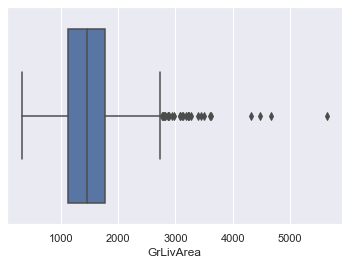

In [20]:
sb.boxplot(data=df, x="GrLivArea")

<AxesSubplot:xlabel='SalePrice'>

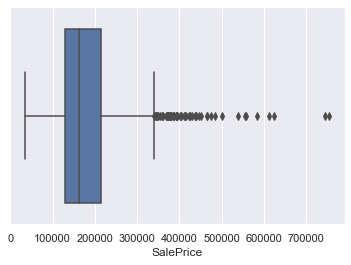

In [21]:
sb.boxplot(data=df, x="SalePrice")

In [22]:
cleandf = df.drop(outliersindex)
cleandf = cleandf.loc[:,["GrLivArea", "SalePrice"]]
cleandf

GrLivArea  SalePrice
0          1710     208500
1          1262     181500
2          1786     223500
3          1717     140000
4          2198     250000
...         ...        ...
1455       1647     175000
1456       2073     210000
1457       2340     266500
1458       1078     142125
1459       1256     147500

[1383 rows x 2 columns]

## Problem 3b and 3C fitting regression model on train set

In [23]:
def salePriceRegressionPartC(variable,dframe):
    X= pd.DataFrame(dframe[variable])   
    Y = pd.DataFrame(dframe['SalePrice']) 
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
    linreg = LinearRegression()
    linreg.fit(X_train, Y_train)
    print('Intercept of Regression \t: b = ', linreg.intercept_)
    print('Coefficients of Regression \t: a = ', linreg.coef_)
    print()
    Y_train_pred = linreg.predict(X_train)
    Y_test_pred = linreg.predict(X_test)
    
    # Plot the Linear Regression line
    f = plt.figure(figsize=(16, 8))
    plt.scatter(X_test, Y_test)
    plt.scatter(X_test, Y_test_pred, color = "r")
    plt.show()
    
    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_train, Y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train, Y_train_pred))
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(Y_train, Y_train_pred)))
    print()
    
    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_test, Y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test, Y_test_pred))
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(Y_test, Y_test_pred)))
    print()


Intercept of Regression 	: b =  [36702.94020084]
Coefficients of Regression 	: a =  [[90.75708252]]



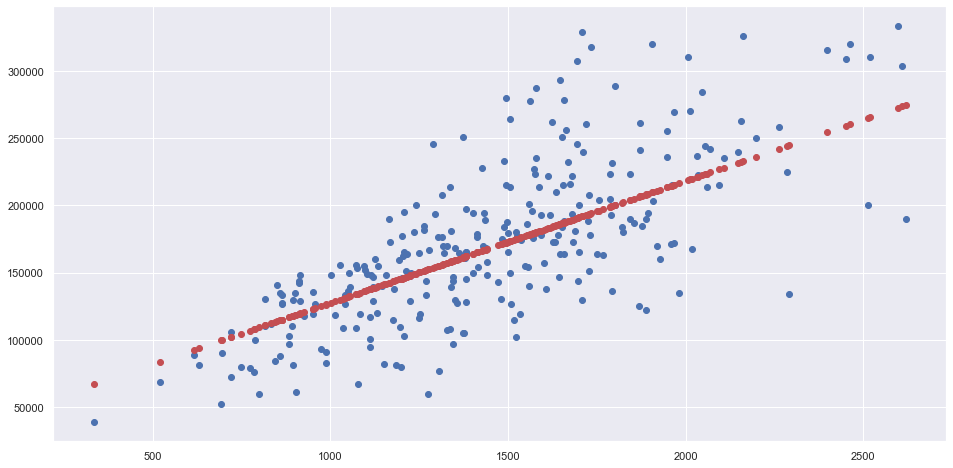

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4643858831035488
Mean Squared Error (MSE) 	: 1828033000.8206167
Root Mean Squared Error (RMSE) 	: 42755.50257944136

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5234338351333577
Mean Squared Error (MSE) 	: 1693952962.7093854
Root Mean Squared Error (RMSE) 	: 41157.65983033274



In [24]:
salePriceRegressionPartC("GrLivArea",cleandf)

### I believe that the model using the cleaned dataframe is better as it has a higher prediction accuracy. Its mean squared error is 1693952962, which is lower than the uncleaned dataframe's 2991406236. Its goodness of fit is also slightly better as its explained variance is 0.523 while the explained variance of the uncleaned dataframe is 0.510